<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод по проекту<a>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

#ссылка на Github
https://github.com/Ibragim0795/project.git

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Признаки**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата
- Целевой признак

**Exited — факт ухода клиента**

In [6]:
#Проверим на дубликаты
data.duplicated().sum()

0

**В одном из столбцов есть пропуски, заполним минимальными значениями**

In [7]:
data['Tenure'] = data['Tenure'].fillna(0)

In [8]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

**Вывод**

- RowNumber — можно удалить не несет ценности для обучения.
- CustomerId — если отсутсвуют дубликаты, столбец также можно удалить.
= Surname —  столбец можно удалить.
- CreditScore — следует проверить распределение и сохранить данный столбец.
- Geography — всего 3 уникальных значения France', 'Spain', 'Germany' — выполнить преобразование OHE / ordinal encoding
- Gender — значение преобразовать — OHE / ordinal encoding

## Исследование задачи

In [9]:
#Создал новый датафрейм "data_ML" — переменная для данных для машинного обучения
#Удалим столбцы, не нужные нам для алгоритма
for_del = ['RowNumber','CustomerId', 'Surname']
data_ML = data.drop(for_del, axis=1)
data_ML.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [10]:
data_ML.shape

(10000, 11)

In [11]:
# Данные подготовим методом OHE, что позволит нам использовать разные модели и не словить дамми ловушку
data_ML = pd.get_dummies(data_ML, drop_first=True)
data_ML.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
data_ML.shape

(10000, 12)

**Вывод**

В новом датафрейме добавился столбец. Столбец Geography содержал 3 класса, Gender_Male 2 класса — в результате мы получили только 2 и 1 столбцов соответственно, что позволяет избежать дами-ловушки.

**Сформируем выборки**

In [13]:
#Разделим на признаки и целевой признак
features = data_ML.drop('Exited', axis=1)
target = data_ML['Exited']

In [14]:
#Валид 60%
features_train, features_validtest, target_train, target_validtest = train_test_split(features,target,train_size=0.6,random_state=12345)

In [15]:
#Валид и тест соответственно поровну по 20% от общей
features_valid, features_test, target_valid, target_test = train_test_split(features_validtest,
                                                    target_validtest,
                                                    train_size=0.5,
                                                    random_state=12345)

**Вывод Были создана выборки:**
- Обучающая - features_train target_train

- Валидационная - features_valid target_valid

- Тестовая - features_test target_test

In [16]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,567,35,8.0,153137.74,1,1,0,88659.07,0,1,1
3411,711,37,8.0,113899.92,1,0,0,80215.20,0,0,0
6027,850,44,3.0,140393.65,2,0,1,186285.52,1,0,1
1247,512,24,6.0,0.00,2,1,0,37654.31,0,0,1
3716,665,27,2.0,147435.96,1,0,0,187508.06,1,0,0


In [17]:
#Для масштабирования методом scaler зафиксируем численные признаки
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [18]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [19]:
#Масштабируем числ признаки обучающей выборки
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.104696,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.104696,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.503694,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.461340,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-0.825373,1.140475,-0.891560,0,0,1.524268,1,0,0


In [20]:
#Масштабируем численные признаки валидационной выборки 
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,-0.825373,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.503694,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.468729,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.748053,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.748053,-1.233163,0.830152,1,0,1.358533,0,1,1


In [21]:
#Масштабируем численные признаки тестовой выборки 
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-0.825373,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.426375,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,0.139662,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.748053,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.748053,0.615625,-0.891560,0,1,-1.070919,0,0,1


В результате мы получили масштабированные признаки для трех выборок. Перейдем к обучению моделей.

In [22]:
def all_models_accuracy(features_train, target_train, features_valid, target_valid):
    model_dt = DecisionTreeClassifier(random_state=1515)
    dt_score = model_dt.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_rf = RandomForestClassifier(max_depth=7, n_estimators=43, min_samples_leaf=3, random_state=1515)
    rf_score = model_rf.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_lg = LogisticRegression(solver = 'liblinear')
    lg_score = model_lg.fit(features_train, target_train).score(features_valid, target_valid)
    print("Точность:" "дерево решений", dt_score, "случайный лес ", rf_score, "логистческая регрессия", lg_score)

In [23]:
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:дерево решений 0.788 случайный лес  0.857 логистческая регрессия 0.8025


**Исследование баланса классов выборки**

In [24]:
target_train.value_counts(normalize = 1)

0    0.800667
1    0.199333
Name: Exited, dtype: float64

<AxesSubplot:ylabel='Frequency'>

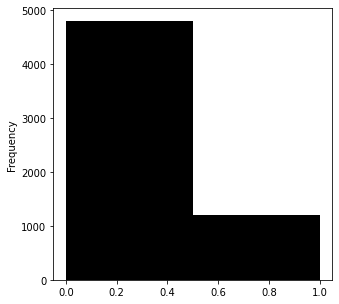

In [25]:
# Построим диаграмму баланса классов
target_train.plot(kind ='hist',color="black", bins=2, figsize=(5,5))

Как мы выяснили в нашей выборке отрицательны ответов ≈80% , положитительных ≈ 20%. С уверенностью можем сказать что имеется дисбаланс.

**Проверка адекватности**

Проверим качество моделей до борьбы с дисбалансом

In [26]:
#Заранее напишем функцию для изучия полноты, точности и F1-меры
def rec_prec_f1(target_valid, prediction):
    print("Полнота" , recall_score(target_valid, prediction))
    print("Точность", precision_score(target_valid, prediction))
    print("F1-мера", f1_score(target_valid, prediction))

In [27]:
# Функция для отображения соотношения ответов моделей (сколько 0, сколько 1)
def all_models_share(features_train, target_train, features_valid, target_valid):
    model_dt = DecisionTreeClassifier(random_state=1515)
    model_dt.fit(features_train, target_train)
    dt_share = pd.Series(model_dt.predict(features_valid)).value_counts(normalize = 1)
    
    
    
    model_rf = RandomForestClassifier(random_state=1515, n_estimators = 100)
    model_rf.fit(features_train, target_train)
    rf_share = pd.Series(model_rf.predict(features_valid)).value_counts(normalize = 1)
    
    model_lg = LogisticRegression(solver = 'liblinear')
    model_lg.fit(features_train, target_train)
    lg_share = pd.Series(model_lg.predict(features_valid)).value_counts(normalize = 1)
    

    
    print("Доли ответов:" "Дерево решений", dt_share, "Случайный лес ", rf_share, "Логистческая регрессия", lg_share , end='')

In [28]:
#Применим функцию отображения соотношения ответов моделей
all_models_share(features_train, target_train, features_valid, target_valid)

Доли ответов:Дерево решений 0    0.801
1    0.199
dtype: float64 Случайный лес  0    0.8725
1    0.1275
dtype: float64 Логистческая регрессия 0    0.9125
1    0.0875
dtype: float64

- 1.Логистичесая регрессия - самая высокая точность
- 2.Случайный лес
- 3.Дерево решений

С учетом дисбаланса результата неудивительно что модели с большой вероятностью будут выдавать ответ 0, построим матрицы ошибок для моделей

**Cлучайный лес**

In [29]:
#Матрица ошибок для 'cлучайный лес'
model_rf = RandomForestClassifier(random_state=1515, n_estimators = 100)
model_rf.fit(features_train, target_train)
rf_prediction = model_rf.predict(features_valid)
confusion_matrix(target_valid, rf_prediction)


array([[1527,   55],
       [ 218,  200]])

In [30]:
for max_depth in range(1,20,1):
    model_rf=RandomForestClassifier(max_depth=max_depth,n_estimators=50,random_state=1234).fit(features_train, target_train)
    rf_prediction=model_rf.predict(features_valid)
    print('max_depth:',max_depth,'F1:',f1_score(target_valid,rf_prediction))
    

max_depth: 1 F1: 0.0
max_depth: 2 F1: 0.20085470085470084
max_depth: 3 F1: 0.23651452282157678
max_depth: 4 F1: 0.3591682419659736
max_depth: 5 F1: 0.47521367521367525
max_depth: 6 F1: 0.5261437908496732
max_depth: 7 F1: 0.5285481239804242
max_depth: 8 F1: 0.5483870967741936
max_depth: 9 F1: 0.5559105431309905
max_depth: 10 F1: 0.5633802816901409
max_depth: 11 F1: 0.5731895223420647
max_depth: 12 F1: 0.5644171779141105
max_depth: 13 F1: 0.5835866261398177
max_depth: 14 F1: 0.5913818722139673
max_depth: 15 F1: 0.5688888888888889
max_depth: 16 F1: 0.5769805680119582
max_depth: 17 F1: 0.5880597014925373
max_depth: 18 F1: 0.5829596412556054
max_depth: 19 F1: 0.5731523378582202


In [31]:
for estim in range(1,50,2):
    model_rf=RandomForestClassifier(max_depth=11,n_estimators=estim,random_state=1234).fit(features_train, target_train)
    rf_prediction=model_rf.predict(features_valid)
    print('estim',estim,'F1:',f1_score(target_valid,rf_prediction))
    

estim 1 F1: 0.45850914205344584
estim 3 F1: 0.5339105339105339
estim 5 F1: 0.5540740740740742
estim 7 F1: 0.56071964017991
estim 9 F1: 0.5460122699386503
estim 11 F1: 0.543778801843318
estim 13 F1: 0.551829268292683
estim 15 F1: 0.558641975308642
estim 17 F1: 0.5502318392581145
estim 19 F1: 0.5701219512195123
estim 21 F1: 0.565284178187404
estim 23 F1: 0.5608628659476117
estim 25 F1: 0.5670261941448382
estim 27 F1: 0.5714285714285714
estim 29 F1: 0.5661538461538462
estim 31 F1: 0.5688073394495413
estim 33 F1: 0.563944530046225
estim 35 F1: 0.5674418604651162
estim 37 F1: 0.5674418604651162
estim 39 F1: 0.5598755832037325
estim 41 F1: 0.5581395348837209
estim 43 F1: 0.5679012345679013
estim 45 F1: 0.5745007680491552
estim 47 F1: 0.5701078582434514
estim 49 F1: 0.5736196319018405


**Вывод: лучшее значение max_depth=17, при котором F1=0.5819793205317577 n_estimators=45 при котором F1=0,5745007680491552.**

In [32]:
rec_prec_f1(target_valid, rf_prediction)

Полнота 0.4473684210526316
Точность 0.7991452991452992
F1-мера 0.5736196319018405


In [33]:
#Расчет roc_auc_rf
rf_probabilities_one_valid = model_rf.predict_proba(features_valid)[:, 1]

auc_roc_rf = roc_auc_score(target_valid, rf_probabilities_one_valid)

auc_roc_rf

0.8493881526019393

Точность и качество низкое.

**Дерево решений**

In [34]:
#Матрица ошибок для дерево решений
model_dt = DecisionTreeClassifier(random_state=1515)
model_dt.fit(features_train, target_train)
dt_prediction = model_dt.predict(features_valid)
confusion_matrix(target_valid, dt_prediction)



array([[1380,  202],
       [ 222,  196]])

In [35]:
# Циклом ищем лучший гиперпораметр max_depth
for depth in range(1,10,1):
    model_dt = DecisionTreeClassifier(max_depth=depth,random_state=1234).fit(features_train, target_train)
    dt_prediction = model_dt.predict(features_valid)
    print('max_depth:',depth,'F1:',f1_score(target_valid, dt_prediction))


max_depth: 1 F1: 0.0
max_depth: 2 F1: 0.5217391304347825
max_depth: 3 F1: 0.4234875444839857
max_depth: 4 F1: 0.5528700906344411
max_depth: 5 F1: 0.5406249999999999
max_depth: 6 F1: 0.56752655538695
max_depth: 7 F1: 0.5485362095531587
max_depth: 8 F1: 0.5454545454545454
max_depth: 9 F1: 0.57703081232493


**Вывод: лучшее значение max_depth=9, при котором F1= 0.5770308123249**

Матрица показала, что дерево решений склонно выдавать позитивные предсказания, очень высокое количество ложных позитивных предсказания

In [36]:
rec_prec_f1(target_valid, dt_prediction)

Полнота 0.49282296650717705
Точность 0.6959459459459459
F1-мера 0.57703081232493


In [37]:
#Расчет roc_auc_dt
dt_probabilities_one_valid = model_dt.predict_proba(features_valid)[:, 1]
auc_roc_dt = roc_auc_score(target_valid, dt_probabilities_one_valid)
auc_roc_dt


0.791020693326236

Видим низкое значение F1, следовательно низкое качество модели, проблема в точности.

**Логистическая регрессия**

In [38]:
#Матрица ошибок для логистической регрессии
model_lg = LogisticRegression(solver = 'liblinear')
model_lg.fit(features_train, target_train)
lg_prediction = model_lg.predict(features_valid)
confusion_matrix(target_valid, lg_prediction)

array([[1506,   76],
       [ 319,   99]])

In [39]:
best_score = 0
best_model_lg = None

for C_param in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
    for m_iter in range(100,1000,100):
        model_lg = LogisticRegression(C=C_param, max_iter = m_iter, random_state = 1234).fit(features_train, target_train)
        lg_prediction = model_lg.predict(features_valid)
        lg_score = f1_score(target_valid, lg_prediction)

        if best_score < lg_score:                     
            best_score = lg_score.copy()
            best_model_lg = model_lg
print(best_model_lg)
print(best_score)

LogisticRegression(C=10, random_state=1234)
0.33613445378151263


In [40]:
rec_prec_f1(target_valid, lg_prediction)

Полнота 0.23923444976076555
Точность 0.5649717514124294
F1-мера 0.33613445378151263


In [41]:
#Для логистической регрессии расчитаем метрику AUC-ROC
lg_probabilities_one_valid = model_lg.predict_proba(features_valid)[:, 1]

auc_roc_lg = roc_auc_score(target_valid, lg_probabilities_one_valid)

auc_roc_lg



0.7585561853144527

In [42]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='-')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend()
    plt.show()
    


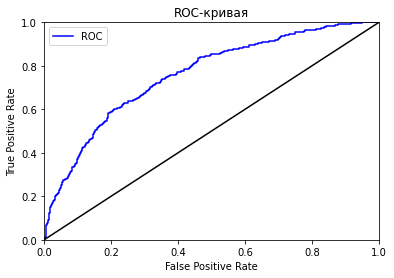

In [43]:
fper, tper, thresholds = roc_curve(target_valid, lg_probabilities_one_valid)
plot_roc_curve(fper, tper)

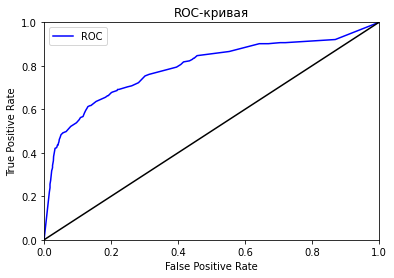

In [44]:
#дерево решений
fper, tper, thresholds = roc_curve(target_valid, dt_probabilities_one_valid)
plot_roc_curve(fper, tper)

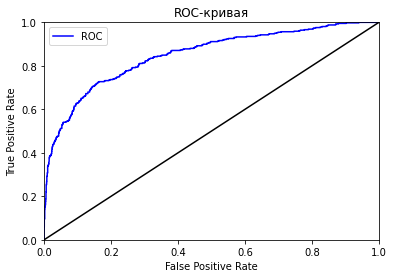

In [45]:
#'cлучайный лес'
fper, tper, thresholds = roc_curve(target_valid, rf_probabilities_one_valid)
plot_roc_curve(fper, tper)


Высокая точность модели объясняется высокой долей негативных ответов в валидационной выборке.

## Борьба с дисбалансом

Как мы выяснили ранее в нашей выборке отрицательны ответов ≈80% , положитительных ≈ 20%. Нам необходмо увеличить количество положительных ответов для достижения баланса. Либо же уменьшить кол-во отрицтаельных ответов.

1. Разделим обучающую выборку на отрицательные и положительные объекты
2. Скопируем несколько раз положительные объекты
3. С учётом полученных данных создадим новую обучающую выборку
4. Перемешаем данные: идущие друг за другом одинаковые вопросы не помогут обучению.
5. Обучим новые модели

In [46]:
#Создадим функцию для увеличения представленной класса в выборке 
def upsample(features, target, repeat, upsampled_сlass):
    """Функция принимаем значение признаков (features[]), целевого признака (target[]), repeat(int / float),
    класс который будет увеличен (upsampled_сlass (0 or 1))"""
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    if upsampled_сlass == 0:
        features_upsampled = pd.concat([features_zeros]* repeat + [features_ones] )
        target_upsampled = pd.concat([target_zeros]* repeat + [target_ones] )
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
        
    elif upsampled_сlass == 1:
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    else:
        features_upsampled = 0
        target_upsampled = 0  
        
        
       
    return features_upsampled, target_upsampled

In [47]:
#Создадим функцию для уменьшения представленной класса в выборке 
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled
  

In [48]:
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, fraction=0.25)

In [49]:
#Протестируем функцию (верное значение)
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 0)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

0    0.941407
1    0.058593
Name: Exited, dtype: float64
(20412,)


In [50]:
#Протестируем функцию (верное значение)
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 3)
features_train_upsampled

0

In [51]:
#Применим функцию upsample 
#увеличим количество положительных ответов в 4 раза
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 1)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

0    0.501043
1    0.498957
Name: Exited, dtype: float64
(9588,)


In [52]:
#Применим функцию downsample
#Уменьшим кол-в пооложительных ответов в 4 раза
#Протестируем функцию (верное значение)
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, 0.2)
print(target_downsampled_train.value_counts(normalize = 0))
print(target_downsampled_train.shape)


1    1196
0     961
Name: Exited, dtype: int64
(2157,)


<AxesSubplot:ylabel='Frequency'>

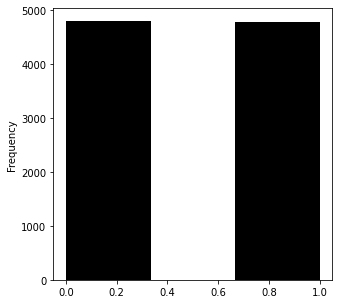

In [53]:
#Ну почти идеально и выигрышнее выглядит upsample с ним и будем работать
target_train_upsampled.plot(kind ='hist', color = 'black', bins=3, figsize=(5,5))

**Обучение моделей на сбалансированной выборке**

In [54]:
#Точность моделей на выборке с дисбалансом


Точность:дерево решений 0.788 случайный лес  0.857 логистческая регрессия 0.8025


In [55]:
#Точность моделей на сбалансированной выборке
all_models_accuracy(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Точность:дерево решений 0.7805 случайный лес  0.813 логистческая регрессия 0.701


**Вывод**

Точность сильно не изменилась 

Проверим качество ответов

In [56]:
#Решающее дерево
model_dt_upsampled = DecisionTreeClassifier(random_state=1515)
model_dt_upsampled.fit(features_train_upsampled, target_train_upsampled)
dt_prediction_upsampled = model_dt_upsampled.predict(features_valid)
rec_prec_f1(target_valid, dt_prediction_upsampled)

Полнота 0.45454545454545453
Точность 0.47381546134663344
F1-мера 0.46398046398046394


In [57]:
#downsample 
model_dt_downsample = DecisionTreeClassifier(random_state=1515)
model_dt_downsample.fit(features_downsampled_train, target_downsampled_train)
dt_prediction_downsample = model_dt_downsample.predict(features_valid)
rec_prec_f1(target_valid, dt_prediction_downsample)

Полнота 0.7296650717703349
Точность 0.3657074340527578
F1-мера 0.48722044728434505


In [58]:
#Расчитаем auc_roc для DTC на сбалансированной выборке
dt_upsampled_valid = model_dt_upsampled.predict_proba(features_valid)[:, 1]
auc_roc_dt = roc_auc_score(target_valid, dt_upsampled_valid)
auc_roc_dt

0.6605849902310079

In [59]:
#downsample
dt_downsample_valid = model_dt_downsample.predict_proba(features_valid)[:, 1]
auc_roc_dt = roc_auc_score(target_valid, dt_downsample_valid)
auc_roc_dt

0.6976391098421838

In [60]:
#Случайный лес
model_rf_upsampled = RandomForestClassifier(max_depth=7, n_estimators=43, min_samples_leaf=3, random_state=1515)
model_rf_upsampled.fit(features_train_upsampled, target_train_upsampled)
rf_prediction_upsampled = model_rf_upsampled.predict(features_valid)
rec_prec_f1(target_valid, rf_prediction_upsampled)

Полнота 0.722488038277512
Точность 0.5392857142857143
F1-мера 0.6175869120654396


In [61]:
#downsample_vol
model_rf_downsample = RandomForestClassifier(max_depth=7, n_estimators=43, min_samples_leaf=3, random_state=1515)
model_rf_downsample.fit(features_downsampled_train, target_downsampled_train)
rf_prediction_downsample = model_rf_downsample.predict(features_valid)
rec_prec_f1(target_valid, rf_prediction_downsample)

Полнота 0.8157894736842105
Точность 0.4246575342465753
F1-мера 0.5585585585585585


In [62]:
#Расчитаем auc_roc для rf на сбалансированной выборке
rf_upsampled_valid = model_rf_upsampled.predict_proba(features_valid)[:, 1]
auc_roc_rf = roc_auc_score(target_valid, rf_upsampled_valid)
auc_roc_rf

0.8527604207622839

In [63]:
#downsample_vol
rf_downsample_valid = model_rf_downsample.predict_proba(features_valid)[:, 1]
auc_roc_rf = roc_auc_score(target_valid, rf_downsample_valid)
auc_roc_rf

0.8436084176652411

In [64]:
#Логистическая регрессия
model_lg_upsampled = LogisticRegression(solver = 'liblinear', class_weight='balanced')
model_lg_upsampled.fit(features_train_upsampled, target_train_upsampled)
lg_prediction_upsampled = model_lg_upsampled.predict(features_valid)
rec_prec_f1(target_valid, lg_prediction_upsampled)

Полнота 0.6842105263157895
Точность 0.3803191489361702
F1-мера 0.4888888888888888


In [65]:
#downsample_vol
model_lg_downsample = LogisticRegression(solver = 'liblinear', class_weight='balanced')
model_lg_downsample.fit(features_downsampled_train, target_downsampled_train)
lg_prediction_downsample = model_lg_downsample.predict(features_valid)
rec_prec_f1(target_valid, lg_prediction_upsampled)

Полнота 0.6842105263157895
Точность 0.3803191489361702
F1-мера 0.4888888888888888


In [66]:
#Расчитаем auc_roc для lg на сбалансированной выборке
lg_upsampled_valid = model_lg_upsampled.predict_proba(features_valid)[:, 1]
auc_roc_lg = roc_auc_score(target_valid, lg_upsampled_valid)
auc_roc_lg

0.7634815115020053

In [67]:
#downsample_vol
lg_downsample_valid = model_lg_downsample.predict_proba(features_valid)[:, 1]
auc_roc_lg = roc_auc_score(target_valid, lg_downsample_valid)
auc_roc_lg

0.7626316394364834

**Вывод**

Показаели всех моделей стали лучше

Лучшие результаты показывает алгоритм случайный лес. На валидационной выборке RandomForestClassifier уже показывает резульаты F1 меры = 0.61, что выше целевого целевого значения.

## Тестирование модели

In [68]:
#Обучим финальную модель убрал - bootstrap = True, class_weight = 'balanced', # от 24.02.2023
model_rf_final = RandomForestClassifier(n_estimators = 50, max_depth= 8, random_state=12345)
model_rf_final.fit(features_train_upsampled, target_train_upsampled)

RandomForestClassifier(max_depth=7, n_estimators=43, random_state=12345)

In [69]:

model_rf_final_prediction = model_rf_final.predict(features_test)
rec_prec_f1(target_test, model_rf_final_prediction)

Полнота 0.723404255319149
Точность 0.5221843003412969
F1-мера 0.6065411298315164


In [70]:
#Расчитаем auc_roc для RFC на тестовой выборке
model_rf_final_valid = model_rf_final.predict_proba(features_test)[:, 1]

auc_roc_rf = roc_auc_score(target_test, model_rf_final_valid)

auc_roc_rf

0.8513006861338599

In [71]:
#Создаем константную модель
target_predict_constant = pd.Series([0]*len(target_test))
target_predict_constant.value_counts()

0    2000
dtype: int64

In [72]:
#Сравним показатель точности (accuracy_score) константной модели и финальной
print('accuracy_score константой модели:', accuracy_score(target_valid, target_predict_constant))
print('accuracy_score финальной модели:', accuracy_score(target_test, model_rf_final_prediction))
#Дополнительно сравним AUC-ROC — единственный параметр подающийся сравнению, потому что константная подель содержит только негативные ответы
print('AUC-ROC константой модели:', roc_auc_score(target_valid, target_predict_constant))
print('AUC-ROC финальной модели:', roc_auc_score(target_test, model_rf_final_valid))

accuracy_score константой модели: 0.791
accuracy_score финальной модели: 0.8015
AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.8513006861338599


Финальная модель показывает результаты лучше, чем константная модель — модель можно считать адекватной.

**Итоговые выводы**

- В первоначальные данных был дисбаланс. 80% / 20%. Из-за этого обученная на этих данных модель не проходила проверку на адекватность. Все модели на первоначальных данных были с высокой степенью ошибок и низким качеством взвешенной величины (F1). Модели показывали низкую точность и полноту.


- Убрал дисбаланс классов в обучающей выборке. Увеличил количество значений позитивного класса в 4 раза. Так был достигнут баланс классов в обучеющей выборке: 0 - 0.501043 1 - 0.498957


- Разобрали несколько вариантов борьбы с дисбалансом upsampling и downsampling


- На новых данных все модели показали результат выше, чем на несбалансированной выборке. Лучшие показатели были у модели случайного леса.
        -Полнота 0.722488038277512
        -Точность 0.5392857142857143
        -F1-мера 0.6175869120654396
        -AUC-ROC 0.8527604207622839

- Финальная модель прошла проверку на адекватность в сравнении с контантной моделью: accuracy_score константой модели: 0.796
        -aaccuracy_score константой модели: 0.791
        -accuracy_score финальной модели: 0.8015
        -AUC-ROC константой модели: 0.5
        -AUC-ROC финальной модели: 0.8513006861338599

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*